So we are going to try to do Gina's thing. That means finding the word, getting the 6 words before and behind, replacing them with the Whissel Dictionary numbers, then doing something with them. I will use the text of The Waves because I already have it. I will use the word 'bird' because it is in there a few times.

In [103]:
import re
import nltk
from statistics import mean

targetDoc = "texts/waves.txt"     # the text to analyze (relative path)
targetWord = "birds"               # the word type you want to score
targetWindow = 6                  # this is tokens before and after target

doc = open(targetDoc, 'r').read()                  # open source text
doc_words = re.sub("[^a-zA-Z']"," ", doc)          # save only text and apostrophes
doc_words = re.sub("('\s|\s')"," ", doc_words).lower().split()     # remove apostrophes outside words
doc_text = nltk.Text(doc_words)
myword = doc_text.concordance(targetWord) 
print(myword)


Displaying 25 of 33 matches:
within was dim and unsubstantial the birds sang their blank melody outside i se
ey have fallen through the trees the birds eyes are bright in the tunnels betwe
water in the white tide said bernard birds are singing up and down and in and o
 the roof like a mist said louis the birds sang in chorus first said rhoda now 
n its eye the bright eyes of hopping birds eagles vultures are apparent they ta
ks not yet formed into one whole the birds whose breasts were specked canary an
 divisions when i wake early and the birds wake me i lie and watch the brass ha
 heads outside the window i see wild birds and impulses wilder than the wildest
and impulses wilder than the wildest birds strike from my wild heart my eyes ar
s float on fathomless depths and the birds sing i dash and sprinkle myself with
o be washed ashore in the garden the birds that had sung erratically and spasmo
owly from side to side the gold eyed birds darting in between the leaves observ
he plates i

    c = nltk.ConcordanceIndex(doc_text.tokens, key = lambda s: s.lower())
basically indexes the words for every token of the text. The 'offset' function returns the list of token offset positioins for a word. I save that as a list, then iterate through it one at a time. For each offset i, get i+1, i+2, i+3. Then as I get each one I run the lookup.

In [104]:
c = nltk.ConcordanceIndex(doc_text.tokens, key = lambda s: s.lower())
# print (c.offsets(targetWord)[1]+1)
locations = c.offsets(targetWord)
# print(locations[0]+1)


So now I have a list of target word offsets out of a list of all the tokens in order.
(c.\_tokens) is the list of words, so a subscript of that will access the exact word at that position. 
Next, open the DA file and read it into a dictionary. Each line is split so the word is the key and the three Whissell numbers is the value. Lookup is simple: get(key) returns value: daffect.get(c.\_tokens[335]).

In [105]:
with open("texts/DAL.txt") as dictionary_affect_file:
   daffect = dict(line.rstrip().split(",", 1) for line in dictionary_affect_file)

alleevals = []                   #declare lists of vals for every token found in text
allaavals = []
alliivals = []
allNonelist = []                 # keep nonelist for token
allAvgeevals = []                # keep list of avg vals for plotting

for location in locations:       #iterate over list of concordance hit offsets
    print (c._tokens[location], "offset =", location)
    phrase = []                  #keep a list of tokens in the phrase
    nonelist = []                #new val lists for each interation of a location
    eevals = []
    aavals = []
    iivals = []     
    for i in range(0-targetWindow, 1+targetWindow):        #iterate over range from target offset, range extends up to but no including
        #print (c._tokens[location+i], daffect.get(c._tokens[location+i]))
        #print (c._tokens[location-i], daffect.get(c._tokens[location-i]))
        phrase.append(c._tokens[location+i]) 
         
        if daffect.get(c._tokens[location+i]) is None:
            nonelist.append(c._tokens[location+i])         # prepare report of words not in DAL
        else:
            eeval, aaval, iival = daffect.get(c._tokens[location+i]).split(",")
            eevals.append(float(eeval))                    # have to convert these to fp numbers
            aavals.append(float(aaval))
            iivals.append(float(iival))
            #print (c._tokens[location+i], "eevals = ", eevals)
            #print ("eevals length =",len(eevals))
            
    alleevals.extend(eevals)                 #add vals from this token onto alltokens list
    allaavals.extend(aavals)                 #to calculate mean of alltokens 
    alliivals.extend(iivals)                 #problem: target word gets added each time
    allNonelist.extend(nonelist)
    #print (alleevals) #check to see
    
    avgeevals = round(mean(eevals), 4)       # rounded to 4 decimal places like Whissell
    avgaavals = round(mean(aavals), 4)       # rounded to 4 decimal places like Whissell
    avgiivals = round(mean(iivals), 2)       # rounded to 2 decimal places like Whissell
    
    allAvgeevals.append(avgeevals - 1.85)  # .extend causes a TypeError: 'float' object is not iterable
    # (map(str,avgeevals))
    
    # here follow the token reports: all the words, the No Vals list, and the scores
    print (" ".join(word for word in phrase))
    print ("No Values for", nonelist)
    print ("EE =", avgeevals, "AA =", avgaavals, "II =", avgiivals, "\n") 

hitratio = 100*(round(len(alleevals) / (len(alleevals) + len(allNonelist)), 3))
meanTotaleevals = round(mean(alleevals), 4)
meanTotalaavals = round(mean(allaavals), 4)
meanTotaliivals = round(mean(alliivals), 2)

# here follow the type reports: the target word, its score, and the hit ration. Need anything else?
print ("Type Means for", targetWord) 
print ("EE =", meanTotaleevals)
print ("AA =", meanTotalaavals)
print ("II =", meanTotaliivals)
print ("Hit Ratio = %",hitratio)
    


birds offset = 392
within was dim and unsubstantial the birds sang their blank melody outside i
No Values for ['unsubstantial']
EE = 1.9574 AA = 1.6928 II = 1.65 

birds offset = 559
have fallen through the trees the birds eyes are bright in the tunnels
No Values for ['tunnels']
EE = 1.9262 AA = 1.5523 II = 1.9 

birds offset = 685
in the white tide said bernard birds are singing up and down and
No Values for ['bernard']
EE = 1.8726 AA = 1.7381 II = 1.85 

birds offset = 795
like a mist said louis the birds sang in chorus first said rhoda
No Values for ['louis', 'rhoda']
EE = 2.0502 AA = 1.7096 II = 1.64 

birds offset = 4184
eye the bright eyes of hopping birds eagles vultures are apparent they take
No Values for ['hopping', 'eagles', 'vultures']
EE = 1.9365 AA = 1.5611 II = 1.88 

birds offset = 5760
yet formed into one whole the birds whose breasts were specked canary and
No Values for ['breasts', 'specked', 'canary']
EE = 1.7522 AA = 1.5489 II = 1.4 

birds offset = 12805
when i wa

Next step is to display values for each word plotted over the book. Really need to follow her methodology as first guesstimate. "The mean of all values for a sample characterizes the sample as a whole." Whissell 2009, 515. She takes the mean for all word sets involved. For _Much Ado about Nothing_ she takes total speeches from each character (p. 516) and compares values to compare characters. In her other test she examines a police-involved shooting in Ireland, the speech of the shooter and of the later police report. There she focuses on the extreme ends of the emotion scales, and the method is not quite clear. She refers to a 2007 article on "Ruth" that clarifies nothing--she compares to "normative" numbers of strong emotion words in her 1998 corpus but does not provide those numbers anywhere that I found. 
Display: from DAL: on a balanced corpus, mean ee is 1.85, with an sd of .36. So, if we subtract 1.85 from our eevals we will get the distance positive or negative from the mean. Lets try it.

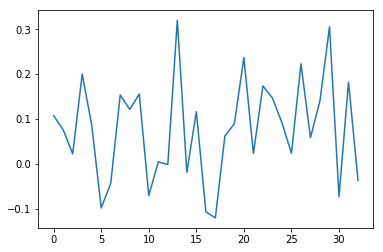

In [106]:
matplotlib.pyplot.plot(allAvgeevals)